# Repetisjon av numeriske metoder og kode i DAFE1000 Matematikk 1000

Her er et utvalg av numeriske metoder og kode for hver undervisningsuke i emnet.

## Uke 3

Inline $\LaTeX$ like $ f(x) = x^2 $

And blocks like

$$
f(x) = \int_{-\infty}^{\infty} e^{-x^2} dx
$$

and

$$
\begin{align}
x+1 & = 0\\
x & = -1 
\end{align}
$$

f(2) = 4.0000


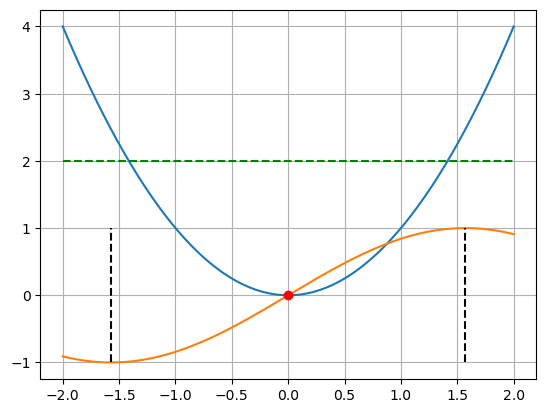

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def g(x):
    return np.sin(x)

print(f'f(2) = {f(2):.4f}')

x = np.linspace(-2, 2, 200)

plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(0, 0, 'ro')
plt.hlines(2, xmin=-2, xmax=2, color='g', linestyle='--')
plt.vlines([-np.pi*0.5, np.pi*0.5], ymin=-1, ymax=1, color='k', linestyle='--')
plt.grid()

In [10]:
import numpy as np
np.linspace?

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7ee9359599e0>
File:            ~/miniconda3/envs/nummet/lib/python3.12/site-packages/numpy/_core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.

## Uke 4

z = 0.0000+2.0000j


Text(0, 0.5, 'Im(z)')

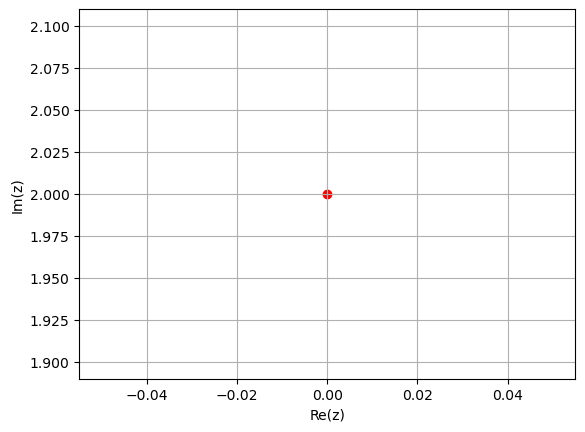

In [34]:
import numpy as np
import matplotlib.pyplot as plt

z = 1+1j
z = z**2

print(f'z = {z:.4f}')

plt.scatter(z.real, z.imag, color='red')
plt.grid(True)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

## Uke 5

Skriv potensen (n) til z^n = a:  4
Skriv realdelen (x) av a = x + iy:  1
Skriv imaginærdelendelen (y) av a = x + iy:  2



z^4 = (1+2j) har følgende røtter:
z0 = 1.176+0.334j
z1 = -0.334+1.176j
z2 = -1.176-0.334j
z3 = 0.334-1.176j


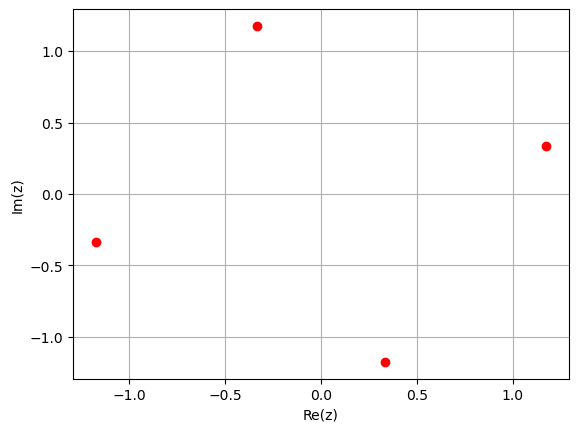

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# les inn n
n = int(input('Skriv potensen (n) til z^n = a: '))

if (n <= 0) | (n != round(n)):
    print('n må være et positivt heltall, prøv igjen')
else: 
    # les inn a
    reell = float(input('Skriv realdelen (x) av a = x + iy: ')) 
    imag = float(input('Skriv imaginærdelendelen (y) av a = x + iy: '))
    a = reell+imag*1j
    print (f'\nz^{n} = {a} har følgende røtter:') # skriver ut likningen
    
    # finn lengden til z^n
    r = np.sqrt(a.real**2 + a.imag**2)
    
    # finn vinkelen til z^n
    if a.real >= 0:
        theta = np.arctan(a.imag/a.real)
    else:
        theta = np.arctan(a.imag/a.real) + np.pi
        
    # finner, skriver ut og plotter røttene
    for i in range(0, n):
        z = r**(1/n) * np.exp(1j*(theta+i*2*np.pi)/n)
        print(f'z{i} = {z:.3f}')
        plt.scatter(z.real, z.imag, color='red')
    plt.grid(True)
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')

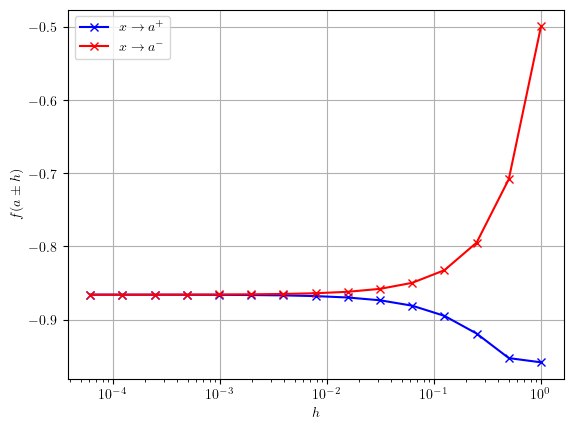

In [6]:
# Skript som estimerar ei grense.
# Uttrykket vi skal ta grensa av, f, og verdien x skal
# gå mot, a, er hardkoda i skriptet.
# Skriptet plottar f(a+h) for h-verdiar stadig nærare
# null med logaritmisk x-akse.
# Den plottar estimatet for både negative og positive
# verdiar av h.

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

# Funksjonsuttrykket
def funk(x):
    #return x**2
    return (np.cos(x)-1/2)/(x-np.pi/3)

N = 15
h = 1

# Det x skal gå mot
a = np.pi/3

Hvektor = np.zeros((N))
GrenseVektorPluss = np.zeros((N))
GrenseVektorMinus = np.zeros((N))

# Løkke der h blir halvert for kvar iterasjon
for n in range(0, N):
    x = a + h                      # Oppdaterar x
    Hvektor[n] = h                 # Lagar vektor for h
    GrenseVektorPluss[n] = funk(x) # Når x går mot a ovanfrå
    x = a - h                      # Oppdaterar x
    GrenseVektorMinus[n] = funk(x) # Når x går mot a nedanfrå
    h = h/2                        # Halverar h

# Plottar estimat
plt.semilogx(Hvektor, GrenseVektorPluss, 'bx-', label=r'$x \rightarrow a^+$')
plt.semilogx(Hvektor, GrenseVektorMinus, 'rx-', label=r'$x \rightarrow a^-$')
plt.grid() # Rutenett
# Tekstboks med forklaring og tekst på aksar
plt.xlabel(r'$h$')
plt.ylabel(r'$f(a\pm{} h)$')
plt.legend()

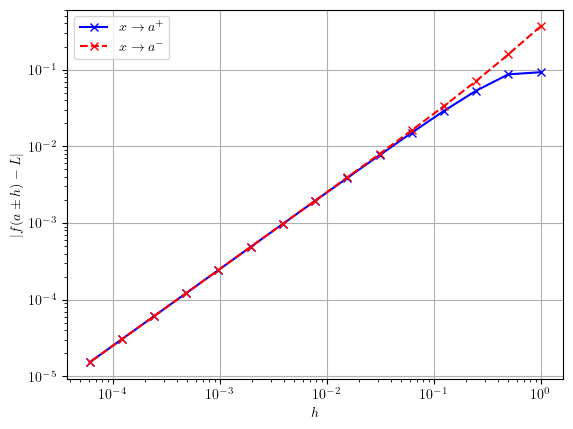

In [18]:
# Skript som plottar forskjellen mellom f(a+h) og grenseverdien
# av f(x) når x går mot a.
# Funksjonsuttrykket vi skal ta grensa av, f, verdien x skal
# gå mot, a, og grenseverdien L er hardkoda i starten av skriptet.
# Skriptet plottar forskjellen mellom f(a+h) og den eksakte
# grenseverdien L for h-verdiar stadig nærare null.
# Denne feilen i estimatet blir plotta både for negative og
# positive verdiar av h.
# Verdien x skal gå mot

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

# Funksjonsuttrykket
def funk(x):
    return (np.cos(x)-1/2)/(x-np.pi/3)

# Kjend eksakt grenseverdi
L = -np.sqrt(3)/2

N = 15
a = np.pi/3
h = 1

Hvektor = np.zeros((N))
FeilPluss = np.zeros((N))
FeilMinus = np.zeros((N))

# Løkke der h blir halvert for kvar iterasjon
for n in range(0, N):
    x = a + h                          # Oppdaterar x
    Hvektor[n] = h                     # Lagar vektor for h
    FeilPluss[n] = np.abs(funk(x) - L) # Feilen når x går mot a ovanfrå
    x = a - h                          # Oppdaterar x
    FeilMinus[n] = np.abs(funk(x) - L) # Feilen når x går mot a nedanfrå
    h = h/2                            # Halverar h

# Plottar feil i estimat på logaritmiske aksar
plt.loglog(Hvektor, FeilPluss, 'bx-', label=r'$x \rightarrow a^+$')
plt.loglog(Hvektor, FeilMinus, 'rx--', label=r'$x \rightarrow a^-$')
plt.grid() # Rutenett

# Set tekst på aksane og boks som forklarar grafane.
plt.xlabel(r'$h$')
plt.ylabel(r'$|f(a\pm h)-L|$')
plt.legend()

Text(0.5, 1.0, '$x \\rightarrow \\infty$')

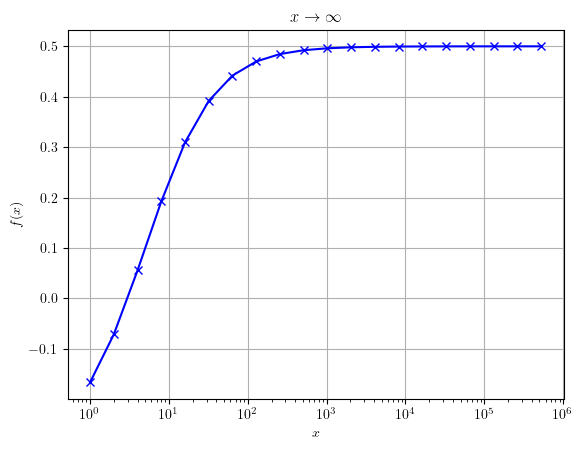

In [10]:
# Skript som estimerar grenseverdien av ein funksjon
# der argmumentet x går mot uendeleg.
# Uttrykket vi skal ta grensa av, f, er hardkoda i
# starten av skriptet.
# Skriptet plottar f(x) for stadig høgare x-verdiar.

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

# Funksjonsuttrykk
def f(x):
    return (x**2-8*x+15)/(2*x**2-50)

N = 20
x = 1

Xvektor = np.zeros((N))
GrenseVektor = np.zeros((N))

# Løkke der x blir dobla for kvar iterasjon
for n in range (0, N):
    Xvektor[n] = x         # Lagar vektor med x-verdiar
    GrenseVektor[n] = f(x) # Estimat for grenseverdien
    x = x*2                # Oppdaterar x

# Plottar estimat
plt.semilogx(Xvektor, GrenseVektor, 'bx-')
plt.grid() # Rutenett
# Set på tittel og tekst på aksane
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'$x \rightarrow \infty$')

## Uke 6

In [37]:
def delt_forskrift(x):
    """Funksjon med delt forskrift."""
    if x<2:
      f = np.cos(np.pi*x)+2
    else:
      f = x**2-2
    return f

In [38]:
def delt_forskrift(x):
    """Funksjon med delt forskrift som kan kallast med vektor-argument."""
    return (x<2) * (np.cos(np.pi*x)+2) + \
           (x>=2) * (x**2-2)

In [36]:
# Implementering av halveringsmetoden for likninga f(x)=0 der 
# f er kontinuerleg på [a,b] og f(a) og f(b) har ulike forteikn.

# Grenser
a = 1
b = 3

def null_funk(x):
    """Gir funksjonen som skal vere null"""
    return x**4 - 4*x**2 - 5

# Funksjonsverdiar
fa = null_funk(a)
fb = null_funk(b)

# Initierer variabel som tel iterasjonane
iterasjonar = 0

# while-løkke for halveringsmetoden
while b-a > 2e-5:
    c = (a+b)/2          # Midtpunktet
    fc = null_funk(c)    # Funksjonsverdi i midtpunktet
    if fa*fc < 0:
        b = c            # Set ny b til c
    else:
        a = c            # Set ny a til c
    iterasjonar = iterasjonar + 1  # Tel iterasjonane

# Reknar ut nytt midtpunkt og skriv svaret til skjerm
x = (a+b)/2
print(f'x = {x:.7f}')

# Skriv talet på iterasjonar til skjerm
print(f'iterasjonar = {iterasjonar}')

x = 2.2360611
iterasjonar = 17


## Uke 7

[0.75       0.5625     0.421875   0.31640625 0.23730469 0.17797852
 0.13348389 0.10011292 0.07508469]


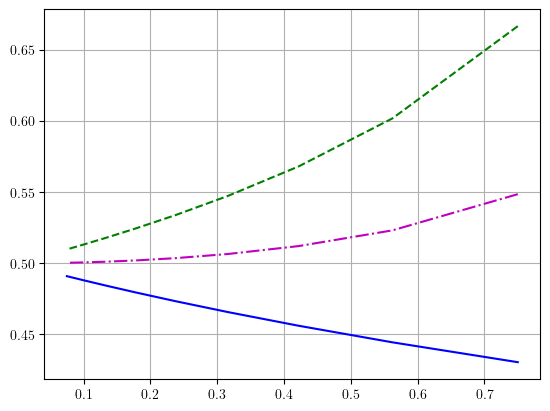

In [21]:
# Skript som plottar den deriverte

import numpy as np
import matplotlib.pyplot as plt

# Funksjonen
def f(x):
    """Funksjonen som skal deriverast"""
    return np.sqrt(x)

# Argument-verdi
a = 1

# Vektor med ulike steglengder
h = 0.75**np.arange(1, 10)    # Grov oppdeling
print(h)

# Tre estimat: framover-, bakover- og midtpunktsformel
fram_formel = (f(a+h)-f(a))/h
bak_formel = (f(a)-f(a-h))/h
midt_formel = (f(a+h)-f(a-h))/(2*h)

# Plottar feilen
plt.plot(h, fram_formel, 'b-')
plt.plot(h, bak_formel, 'g--')
plt.plot(h, midt_formel, 'm-.')
plt.grid()
plt.show()    

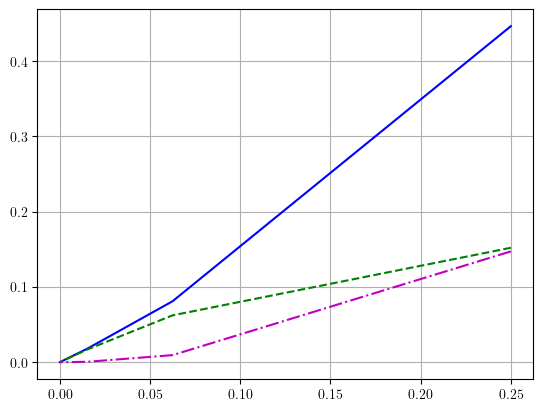

In [22]:
# Skript som plottar feilen i ulike estimat for
# den deriverte.

# Funksjonen - og den eksakte deriverte
def f(x):
    """Funksjonen som skal deriverast"""
    return np.sin(x**2)
    
def f_d(x):
    """Den deriverte"""
    return 2*x*np.cos(x**2)

# Argument-verdi
a = 1

# Eksakt svar
derivert = f_d(a)

# Vektor med ulike steglengder
h = 0.25**np.arange(1, 8)    # Grov oppdeling

# Tre estimat: framover-, bakover- og midtpunktsformel
fram_formel = np.abs((f(a+h)-f(a))/h - derivert)
bak_formel = np.abs((f(a)-f(a-h))/h - derivert)
midt_formel = np.abs((f(a+h)-f(a-h))/(2*h) - derivert)

# Plottar feilen
plt.plot(h, fram_formel, 'b-')
plt.plot(h, bak_formel, 'g--')
plt.plot(h, midt_formel, 'm-.')
plt.grid()
plt.show()    

## Uke 9

In [23]:
# Skript som implementerer Newtons metode

# Bestemmer x_0
x = 1

# Presisjon
pres = 1e-5

# Initerer talet på iterasjonar
iterasjonar = 0

# Lagar ein variabel for "gamal" x-verdi (tilfeldig tal)
x_gml = 100

while abs(x-x_gml) > pres:
    # Kopierer den gamle x
    x_gml = x
    # Iterasjonsskjema
    x = x-(np.sqrt(x)-np.cos(x)) / \
        (1/(2*np.sqrt(x))+np.sin(x))
    # Tel iterasjonar
    iterasjonar = iterasjonar+1

# Skriv svaret til skjerm
print(f'x = {x:.5f}')

# Skriv talet på iterasjonar til skjerm
print(f'iterasjonar = {iterasjonar}')

x = 0.64171
iterasjonar = 4


## Uke 10

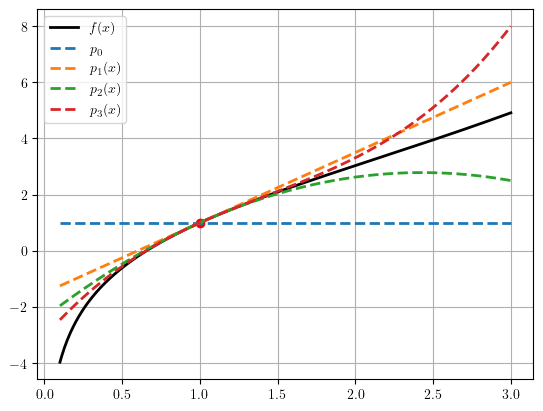

In [31]:
# Dette skriptet plottar funksjonen
# f(x)=e^((x-1)/2) + 2 ln x
# saman med Taylor-polynoma av grad
# 0, 1, 2 og 3 omkring x=1.

import numpy as np
import matplotlib.pyplot as plt

# x-verdiar
x = np.linspace(0.1, 3, 310)

# Funksjonane
def f(x):
    return np.exp((x-1)/2)+2*np.log(x)
    
def p0(x):
    return 1*x**0

def p1(x):
    return p0(x) + 5/2*(x-1)

def p2(x):
    return p1(x) - 7/8*(x-1)**2

def p3(x):
    return p2(x) + 11/16*(x-1)**3

plt.plot(1, f(1), 'ro')
plt.plot(x, f(x), 'k-', linewidth=2, label=r'$f(x)$')
plt.plot(x, p0(x), '--', linewidth=2, label=r'$p_0$')
plt.plot(x, p1(x), '--', linewidth=2, label=r'$p_1(x)$')
plt.plot(x, p2(x), '--', linewidth=2, label=r'$p_2(x)$')
plt.plot(x, p3(x), '--', linewidth=2, label=r'$p_3(x)$')
plt.grid()

# Tekstboks som forklarar plotta
plt.legend()


## Uke 11

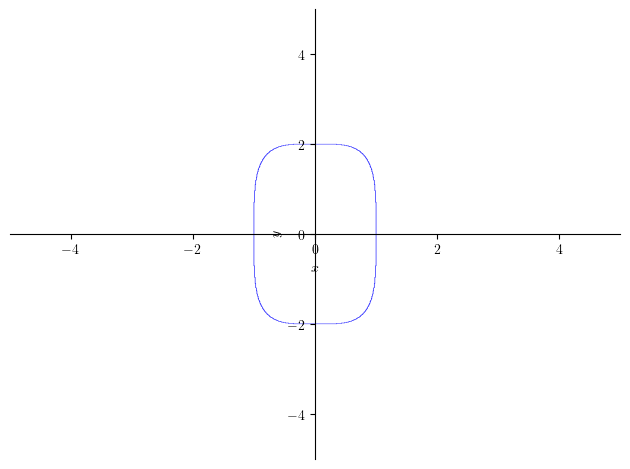

In [33]:
from sympy import var, plot_implicit

var('x y')

plot_implicit(x**4+(y/2)**4-1)

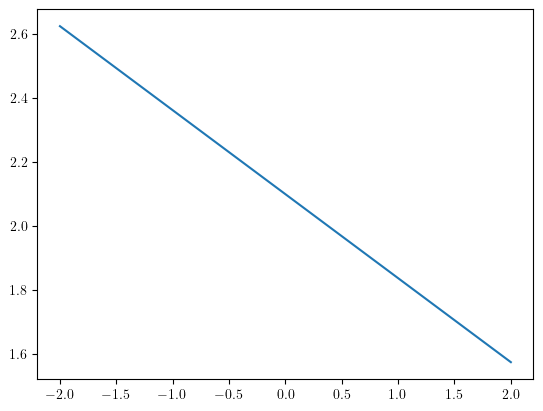

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)

def f(x):
    return 15**(1/4)-(2/15**(3/4))*(x-0.5)

plt.plot(x, f(x))

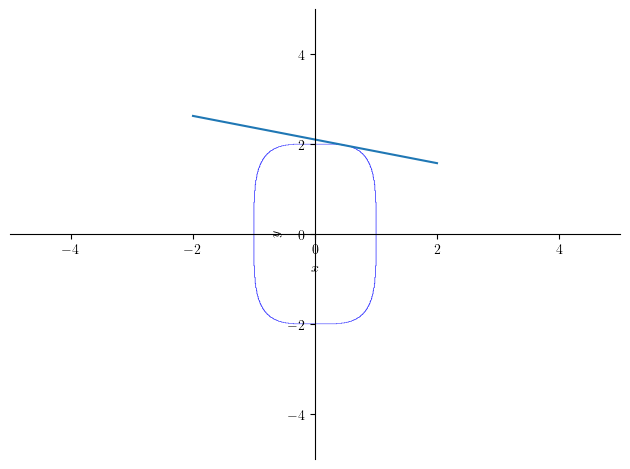

In [35]:
from sympy import var, plot_implicit
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)

def f(x):
    return 15**(1/4)-(2/15**(3/4))*(x-0.5)

fig, ax = plt.subplots()

plt.plot(x, f(x))
var('x y')

plot_implicit(x**4+(y/2)**4-1, fig=fig, ax=ax)

In [36]:
import numpy as np
import sympy

T = np.array([[2, 3, 7], [4, -5, 3]])

R = sympy.Matrix(T).rref()[0]
R = np.array(R)

print(R)

[[1 0 2]
 [0 1 1]]


## Uke 12

In [37]:
# Se uke 13

## Uke 13

In [38]:
import numpy as np
import sympy

A = np.array([[3, 8], [4, 11]])
b = np.array([[5], [7]])

print(A)
print(b)

#T = np.array([[3, 8, 5], [4, 11, 7]])
T = np.hstack((A, b))
print(T)

R = sympy.Matrix(T).rref()[0]
R = np.array(R)

print(R)

[[ 3  8]
 [ 4 11]]
[[5]
 [7]]
[[ 3  8  5]
 [ 4 11  7]]
[[1 0 -1]
 [0 1 1]]


In [39]:
print(A)

print(A.T)           # den transponerte

K = np.linalg.inv(A) # inversmatrise
print(K)
print(A@K)
print(K@A)

[[ 3  8]
 [ 4 11]]
[[ 3  4]
 [ 8 11]]
[[11. -8.]
 [-4.  3.]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [40]:
print(np.linalg.det(A)) #determinanten

1.0


In [41]:
x = K@b

print(x)

[[-1.]
 [ 1.]]


## Uke 14

In [42]:
import numpy as np

def f(x):
    # Funksjonen
    return np.sin(x**2)

a = 0.5
b = 1.5      # Grenser
N = 20       # Rektangel
dx = (b-a)/N # Breidde
integral = 0

for n in range(1, N+1):
  x = a+(n-0.5)*dx            # Oppdaterar x
  integral = integral+f(x)*dx # Legg til areal

print(integral)        # Skriv svar til skjerm

0.7370540535373423


In [43]:
"""Implementering som estimerer eit integral på tre måtar:
Venstre og høgre Riemann-sum og trapesmetoden.
"""

# Talet på rektangel
n = int(input('Kor mange rektangel? '))

def funk(x):
    """Funksjonen"""
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summane V og H
h = (b-a)/n
V = 0
H = 0

# Reknar ut venstresummen
for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Reknar ut høgresummen
for i in range(1, n+1):
    xi = a+i*h
    H = H+h*funk(xi)

# Skriv summane V, H og T til skjerm
print(f'V = {V:.4f}')
print(f'H = {H:.4f}')
T=(V+H)/2            # Trapessummen
print(f'T = {T:.4f}')

Kor mange rektangel?  100


V = 19.7408
H = 20.2608
T = 20.0008


## Uke 15

In [47]:
def riemann_funk_V(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med venstre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-1)*delta_x             # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def riemann_funk_H(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med høgre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+n*delta_x                 # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def riemann_funk_M(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med venstre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-0.5)*delta_x           # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def trapes_funk(funk, a, b, N):
    """Implementering av trapesmetoden for numerisk integrasjon.
    
    Integranden funk, grensene a og b, og oppdelinga N
    blir gitt som input.
    """
    
    # Steglengda
    h = (b-a)/N
    
    # Bidrag frå endane
    T = h/2*(funk(a)+funk(b))
    
    # Resten av bidraga
    for i in range(1, N):
        xi = a+i*h
        T = T+h*funk(xi)

    return T

def simpsons_funk(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral 
    ved hjelp av Simpsons metode.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen og tar med endane:
    S = (funk(a)+funk(b))
    
    # Oddetalsbidrag
    for n in range(1, N, 2):
        x = a+n*delta_x           # Oppdaterar x
        S = S+4*funk(x)           # Oppdaterar summen
    
    # Partalssbidrag
    for n in range(2, N-1, 2):
        x = a+n*delta_x           # Oppdaterar x
        S = S+2*funk(x)           # Oppdaterar summen
    
    # Korrigerar svar med delta_x/3
    S = S*delta_x/3
    
    return S

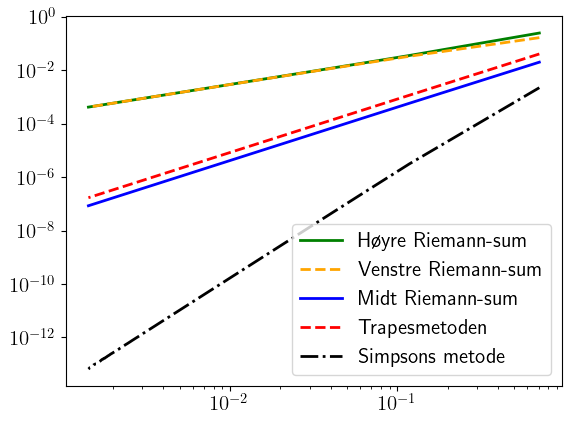

In [50]:
"""Implementering som plottar feilen i eit estimat
for ein Riemann-sum, trapesmetoden og Simpsons metode.
"""

import numpy as np
import matplotlib.pyplot as plt

def funk(x):
    """Integrand"""
    return np.sqrt(4-x**2)

a = 0
b = np.sqrt(2)
fasit = 1 + np.pi*0.5

# Lagar vektor med n-verdiar
n_start = 2
n_steg = 10
n_slutt = 1000
n_vektor = np.arange(n_start, n_slutt+1, n_steg)
h_vektor = (b-a)/n_vektor

H_vektor = np.zeros_like(h_vektor)
V_vektor = np.zeros_like(h_vektor)
M_vektor = np.zeros_like(h_vektor)
T_vektor = np.zeros_like(h_vektor)
S_vektor = np.zeros_like(h_vektor)

# Lagar vektorar med estimat
indeks = 0
for n in n_vektor:
    H_vektor[indeks] = riemann_funk_H(funk, a, b, n)
    V_vektor[indeks] = riemann_funk_V(funk, a, b, n)
    M_vektor[indeks] = riemann_funk_M(funk, a, b, n)
    T_vektor[indeks] = trapes_funk(funk, a, b, n)
    S_vektor[indeks] = simpsons_funk(funk, a, b, n)
    indeks = indeks+1

# Plottar feilen
plt.rcParams.update({'font.size': 15})
plt.loglog(h_vektor, abs(H_vektor-fasit), 'g-', linewidth=2, 
           label='Høyre Riemann-sum')
plt.loglog(h_vektor, abs(V_vektor-fasit), '--', color='orange', linewidth=2, 
           label='Venstre Riemann-sum')
plt.loglog(h_vektor, abs(M_vektor-fasit), 'b-', linewidth=2, 
           label='Midt Riemann-sum')
plt.loglog(h_vektor, abs(T_vektor-fasit), 'r--', linewidth=2,
           label='Trapesmetoden')
plt.loglog(h_vektor, abs(S_vektor-fasit), 'k-.', linewidth=2,
           label='Simpsons metode')

plt.legend(loc='lower right')
plt.show()

## Uke 17

In [51]:
# Skript som reknar volum og overflate-areal
# av ei flaske gitt ved profil-funksjonen
# p(x) frå x=a til x=b.
# Input er p(x), p'(x), a og b.
# I tillegg blir oppdelinga n gitt frå kommando-
# vindauga ved input-funksjonen.
# Sjølve integral-estimatet blir gjort med
# Trapesmetoden.

# Grenser
a = -5
b = 5

# Funksjon og derivert
def p(x):
    return 0.7*np.atan(4-3*x)+2

def pd(x):
    return -2.1/((4-3*x)**2+1)

# Les inn talet på delintervall frå skjerm
n = int(input('Kor mange delintervall skal vi bruke? '))

# Steglengde
dx = (b-a)/n

# Initerar og tar med endepunkta
volum = (p(a)**2 + p(b)**2)/2
areal = p(a)*np.sqrt(1 + pd(a)**2)/2
areal = areal + p(b)*np.sqrt(1 + pd(b)**2)/2

# Summerar over alle indre punkt
for n in range(1, n):
  x = a + n*dx
  volum = volum + p(x)**2
  areal = areal + p(x)*np.sqrt(1 + pd(x)**2)

# Opdaterar med dei rette faktorane og skriv til skjerm
volum = np.pi*dx*volum
areal = 2*np.pi*dx*areal

print(volum)
print(areal)

Kor mange delintervall skal vi bruke?  100


189.21519244364626
153.5228029285303


## Uke 18

Gi x_0 (mellom -2 og 2):  -2
Gi y_0 (mellom 0 og 4):  3.5


0


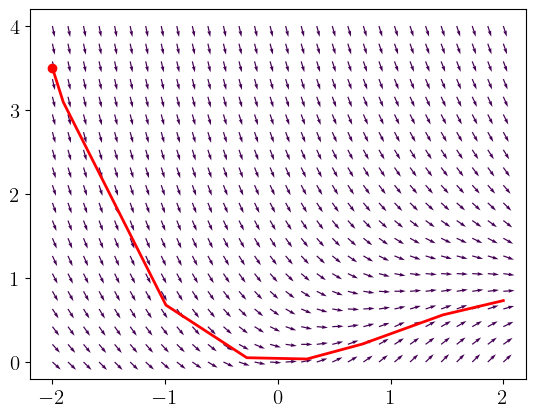

In [60]:
# Erstatter PlottRetningsfelt.m

# Skript som plottar retningsfelt for ei 
# gitt 1. ordens differensiallikning. 
# Det brukar Matplotlib sin quiver-funksjon 
# til å gjere dette.
#
# Ein del "inputs" er hard-koda. Dette gjeld 
# sjølve differensiallikninga, gitt ved 
# funksjonen F(x,y)=y'. Det gjeld også minimal- 
# og maksimal-verdiane til x og y, og det 
# gjeld inndelinga på rutenetet kor mange 
# punkt ein skal ta med for x og y.
# Der er ingen garanti for at løysinga av 
# initialverdiproblemet vil vere 
# avgrensa av dei gitte grensene for x og y.

import numpy as np
import matplotlib.pyplot as plt

# Diff.-likning: y'=F(x,y)
def F(x,y):
    return np.sin(x) - y

# Bestemmer intervall for x og y:
x_min = -2
x_max = 2
y_min = 0
y_max = 4

# Set opp rutenettet
x_steps = 30
y_steps = 20           # Talet på punkt i x- og y-retning

# Set opp matriser med x- og y-verdiar
x = np.linspace(x_min, x_max, x_steps)       # Vektor med x-verdiar
y = np.linspace(y_min, y_max, y_steps)       # Vektor med y-verdiar
[X, Y] = np.meshgrid(x, y)                

# Plottar retningsfeltet

U = F(X, Y)                                # Matrise med y'
scale = np.sqrt(1 + U**2)                  # Faktor til å justere lengda på pilene
plt.quiver(X, Y, 1./scale, U/scale, 0.5)   # Plottar retningsfelt

##################################################################################

# Erstatter PlotLoeysinga.m

# Dette skriptet plottar numerisk løysing 
# for ei differensiallikning med gitt 
# startkrav. Til dette brukar skriptet 
# Scipy-funksjonen solve_ivp, som er ein 
# Runge-Kutta-metode.

from scipy.integrate import solve_ivp

# Gir initialkrav:
x0 = float(input(f"Gi x_0 (mellom {x_min} og {x_max}): "))
y0 = float(input(f"Gi y_0 (mellom {y_min} og {y_max}): "))

# Sjekkar at x_0 og y_0 ligg i rektangelet definert frå før
if x0 < x_min or x0 > x_max:
    raise RuntimeError(f"x_0 må ligge mellom {x_min} og {x_max}")
elif y0 < y_min or y0 > y_max:
    raise RuntimeError(f"y_0 må ligge mellom {y_min} og {y_max}")

# Finn løysinga på startverdiproblemet - numerisk
sol = solve_ivp(F, [x0, x_max], [y0])
print(sol.status)

# Plottar løysinga saman med retningsfeltet vi har laga frå før
plt.plot(x0, y0, 'ro', linewidth=2)       # Plottar starverdi
plt.plot(sol.t, sol.y[0], 'r-', linewidth=2) # Plottar løysinga

## Uke 19

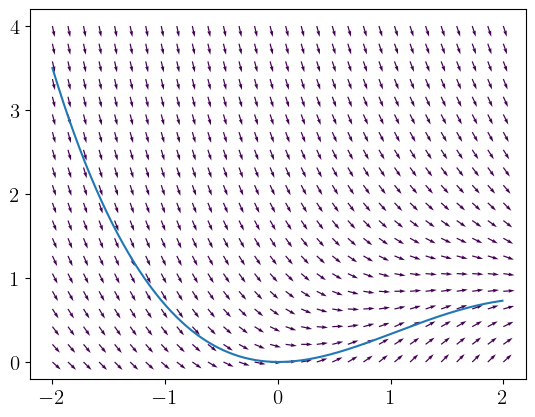

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Diff.-likning: y'=F(x,y)
def F(x,y):
    return np.sin(x) - y

# Bestemmer intervall for x og y:
x_min = -2
x_max = 2
y_min = 0
y_max = 4

# Set opp rutenettet
x_steps = 30
y_steps = 20           # Talet på punkt i x- og y-retning

# Set opp matriser med x- og y-verdiar
x = np.linspace(x_min, x_max, x_steps)       # Vektor med x-verdiar
y = np.linspace(y_min, y_max, y_steps)       # Vektor med y-verdiar
[X, Y] = np.meshgrid(x, y)                

# Plottar retningsfeltet

U = F(X, Y)                                # Matrise med y'
scale = np.sqrt(1 + U**2)                  # Faktor til å justere lengda på pilene
plt.quiver(X, Y, 1./scale, U/scale, 0.5)   # Plottar retningsfelt

##################################################################################

# Funksjon
def F(x,y):
    return np.sin(x) - y

# Start og slutt
x0 = -2
y0 = 3.5
x_slutt = 2

# Oppdeling
N = 500
h = (x_slutt - x0)/N

# Metoden
x_vektor = np.zeros((N))
y_vektor = np.zeros((N))
x = x0
y = y0
for n in range(0, N):
  x_vektor[n] = x
  y_vektor[n] = y
  y = y + F(x,y)*h
  x = x + h

# Plotter resultat
plt.plot(x_vektor, y_vektor)